In [1]:
import torch.nn.functional as F
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from helpers import *
%matplotlib inline

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

In [2]:
!dir

 ’®¬ ў гбва®©бвўҐ C Ё¬ҐҐв ¬ҐвЄг SYSTEM
 ‘ҐаЁ©­л© ­®¬Ґа в®¬ : 6444-4294

 ‘®¤Ґа¦Ё¬®Ґ Ї ЇЄЁ C:\Users\Admin\Desktop\gisspot\ml\experiments

23.03.2021  18:29    <DIR>          .
23.03.2021  18:29    <DIR>          ..
23.03.2021  15:17    <DIR>          .ipynb_checkpoints
23.03.2021  15:02         4я512я712 20060504_041254_NOAA_18.m.pro
23.03.2021  15:43         4я512я712 20060504_072852_NOAA_12.m.pro
23.03.2021  16:01         4я512я712 20060504_125118_NOAA_17.m.pro
23.03.2021  18:29             5я607 helpers.py
23.03.2021  18:28         1я488я283 parser.ipynb
23.03.2021  18:29    <DIR>          __pycache__
               5 д ©«®ў     15я032я026 Ў ©в
               4 Ї Ї®Є  360я310я030я336 Ў ©в бў®Ў®¤­®


In [3]:
b0, data1 = parse('20060504_041254_NOAA_18.m.pro')
data1 = normalize(data1)

In [4]:
b0, data2 = parse('20060504_072852_NOAA_12.m.pro')
data2 = normalize(data2)

In [5]:
point_coors = []
for x in range(461, 637, 20):
    for y in range(826, 929, 20):
        point_coors.append([y, x])
wind_size = (12, 12)
vicinity_size = (100, 100)

In [6]:
new_coors = []
for point_coor in point_coors:
    new_coor, _ = find_best_match(data1, data2, point_coor, 
                                  wind_size, vicinity_size, ssim, 
                                  mode='max', coefs={'k1':0.01, 'k2':0.03, 'L':2**16-1})
    new_coors.append(new_coor)
new_coors = np.array(new_coors)
point_coors = np.array(point_coors)

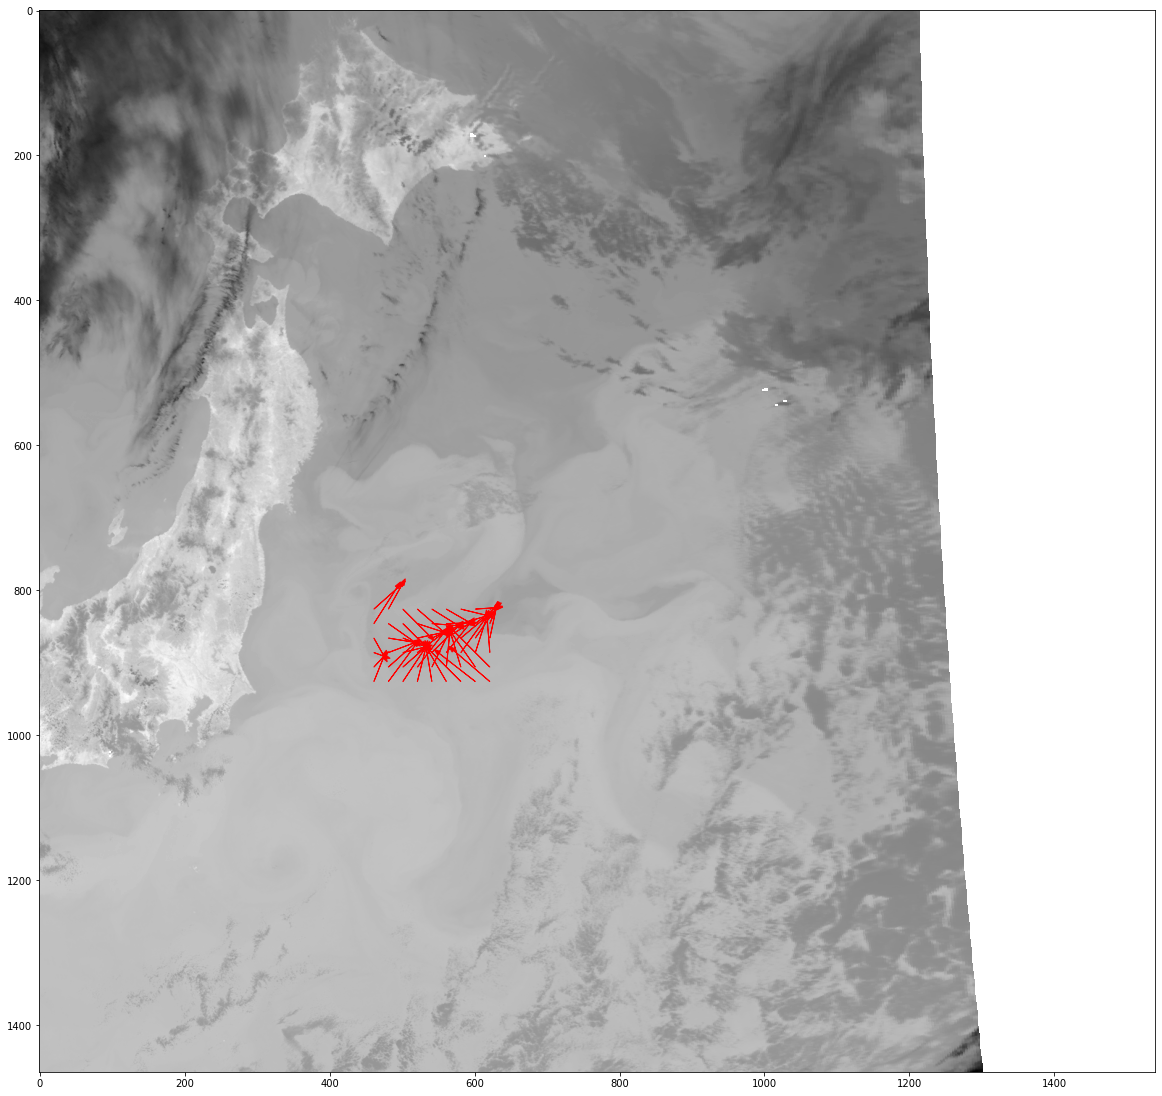

In [7]:
plt.figure(figsize=(20, 20))
plt.imshow(data1, cmap='gray')
for x1, y1, x2, y2 in zip(point_coors[:, 1], point_coors[:, 0], new_coors[:, 1], new_coors[:, 0]):
    plt.arrow(x1, y1, x2-x1, y2-y1, head_width=6, color='r')
# plt.scatter(new_coors[:, 1], new_coors[:, 0])
# for i in range(len(point_coors)):
#     plt.plot([point_coors[i][1], new_coors[i][1]], [point_coors[i][0], new_coors[i][0]], c='r')
#plt.scatter([point_coor[0]], [point_coor[1]])

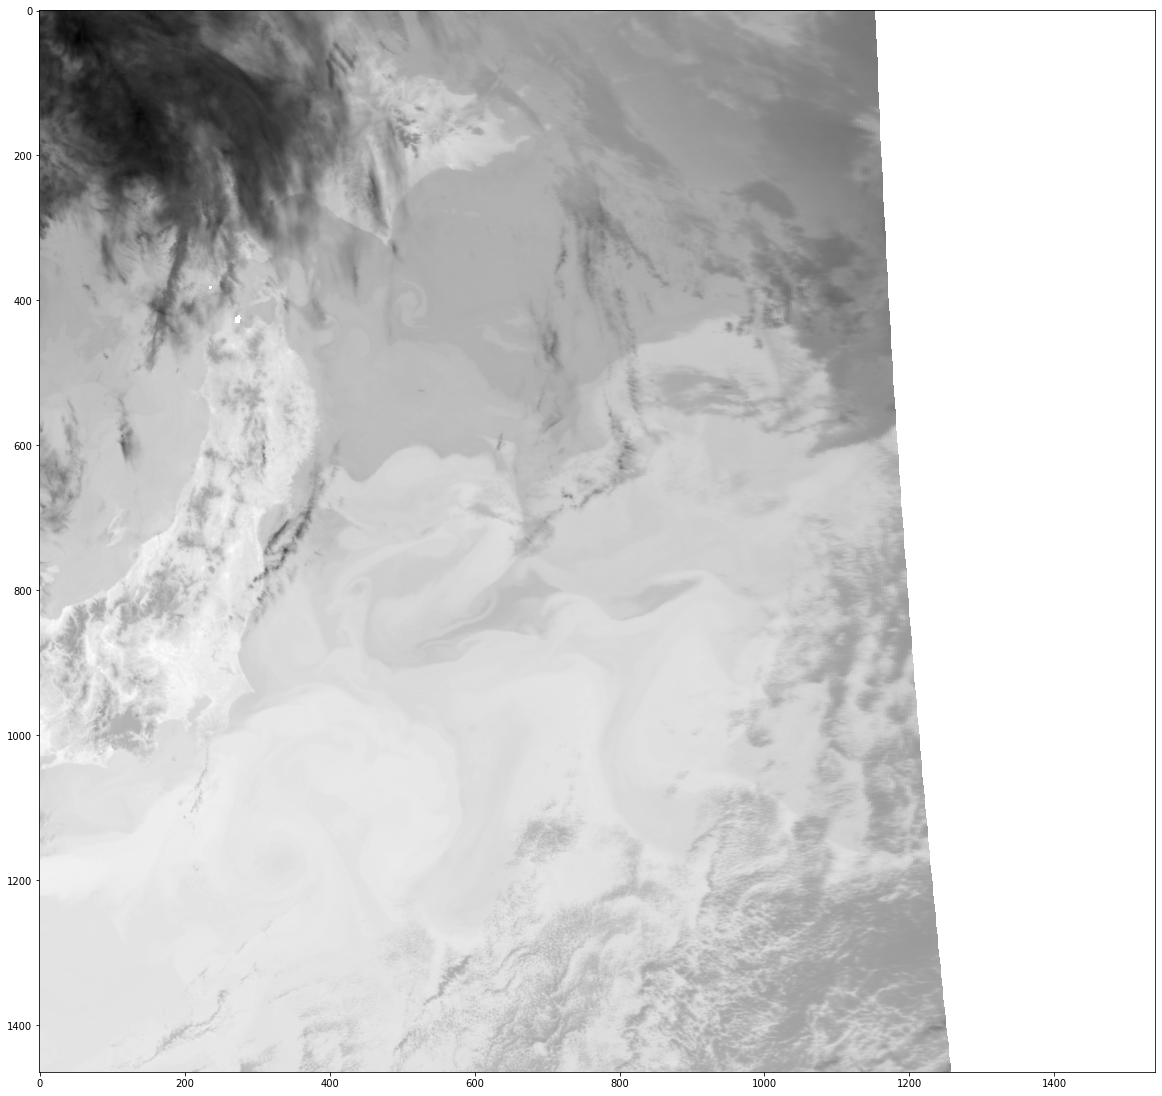

In [54]:
plt.figure(figsize=(20, 20))
plt.imshow(data2, cmap='gray')